In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns
pd.set_option('display.max_columns', None) # allows to see all columns 

In [2]:
data = pd.read_csv('traffic_final.csv', delimiter = ',')

# EDA

In [3]:
df = data.copy()

In [4]:
df

Unnamed: 0  Identifiant arc            Libelle  \
0               0             4264  AV_Champs_Elysees   
1               1             4264  AV_Champs_Elysees   
2               2             4264  AV_Champs_Elysees   
3               3             4264  AV_Champs_Elysees   
4               4              191          Sts_Peres   
...           ...              ...                ...   
27925       27925             4264  AV_Champs_Elysees   
27926       27926             5672         Convention   
27927       27927             5672         Convention   
27928       27928             5672         Convention   
27929       27929             5672         Convention   

       Date et heure de comptage  Débit horaire  Taux d'occupation  \
0      2023-02-01T23:00:00+01:00          764.0           11.28000   
1      2023-02-01T22:00:00+01:00          819.0           16.52056   
2      2023-02-01T20:00:00+01:00         1082.0           19.98722   
3      2023-02-01T18:00:00+01:00         1027.0           23.27334   
4      2023-08-10T00:00:00+02:00          257.0            3.04445   
...                          ...            ...                ...   
27925  2023-08-01T02:00:00+02:00          326.0            3.92334   
27926  2023-08-01T01:00:00+02:00           61.0            0.74666   
27927  2023-08-01T04:00:00+02:00           16.0            0.70500   
27928  2023-08-01T03:00:00+02:00           20.0            0.39444   
27929  2023-08-01T02:00:00+02:00           22.0            0.40722   

      Etat trafic  Identifiant noeud amont           Libelle noeud amont  \
0          Fluide                     2294  Av_Champs_Elysees-Washington   
1      Pré-saturé                     2294  Av_Champs_Elysees-Washington   
2      Pré-saturé                     2294  Av_Champs_Elysees-Washington   
3      Pré-saturé                     2294  Av_Champs_Elysees-Washington   
4          Fluide                      114            Sts_Peres-Voltaire   
...           ...                      ...                           ...   
27925      Fluide                     2294  Av_Champs_Elysees-Washington   
27926      Fluide                     2973             Convention-Blomet   
27927      Fluide                     2973             Convention-Blomet   
27928      Fluide                     2973             Convention-Blomet   
27929      Fluide                     2973             Convention-Blomet   

       Identifiant noeud aval       Libelle noeud aval  Etat arc  \
0                        2293  Av_Champs_Elysees-Berri  Invalide   
1                        2293  Av_Champs_Elysees-Berri  Invalide   
2                        2293  Av_Champs_Elysees-Berri  Invalide   
3                        2293  Av_Champs_Elysees-Berri  Invalide   
4                         119     Sts_Peres-Universite  Invalide   
...                       ...                      ...       ...   
27925                    2293  Av_Champs_Elysees-Berri  Invalide   
27926                    2937      Lecourbe-Convention  Invalide   
27927                    2937      Lecourbe-Convention  Invalide   
27928                    2937      Lecourbe-Convention  Invalide   
27929                    2937      Lecourbe-Convention  Invalide   

                       timestamp   timestamp_short        date  \
0      2023-02-01 22:00:00+00:00  2023-02-01T22:00  2023-02-01   
1      2023-02-01 21:00:00+00:00  2023-02-01T21:00  2023-02-01   
2      2023-02-01 19:00:00+00:00  2023-02-01T19:00  2023-02-01   
3      2023-02-01 17:00:00+00:00  2023-02-01T17:00  2023-02-01   
4      2023-08-09 22:00:00+00:00  2023-08-09T22:00  2023-08-09   
...                          ...               ...         ...   
27925  2023-08-01 00:00:00+00:00  2023-08-01T00:00  2023-08-01   
27926  2023-07-31 23:00:00+00:00  2023-07-31T23:00  2023-07-31   
27927  2023-08-01 02:00:00+00:00  2023-08-01T02:00  2023-08-01   
27928  2023-08-01 01:00:00+00:00  2023-08-01T01:00  2023-08-01   
27929  2023-08-01 00:00:0

In [5]:
columns_df = []
for col in df.columns:
    columns_df.append(col)

columns_df.remove("Date et heure de comptage")
columns_df.remove("Débit horaire")
columns_df.remove("Taux d'occupation")
columns_df.remove("Libelle")

df = df.drop(columns=columns_df)
df



Libelle  Date et heure de comptage  Débit horaire  \
0      AV_Champs_Elysees  2023-02-01T23:00:00+01:00          764.0   
1      AV_Champs_Elysees  2023-02-01T22:00:00+01:00          819.0   
2      AV_Champs_Elysees  2023-02-01T20:00:00+01:00         1082.0   
3      AV_Champs_Elysees  2023-02-01T18:00:00+01:00         1027.0   
4              Sts_Peres  2023-08-10T00:00:00+02:00          257.0   
...                  ...                        ...            ...   
27925  AV_Champs_Elysees  2023-08-01T02:00:00+02:00          326.0   
27926         Convention  2023-08-01T01:00:00+02:00           61.0   
27927         Convention  2023-08-01T04:00:00+02:00           16.0   
27928         Convention  2023-08-01T03:00:00+02:00           20.0   
27929         Convention  2023-08-01T02:00:00+02:00           22.0   

       Taux d'occupation  
0               11.28000  
1               16.52056  
2               19.98722  
3               23.27334  
4                3.04445  
...                  ...  
27925            3.92334  
27926            0.74666  
27927            0.70500  
27928            0.39444  
27929            0.40722  

[27930 rows x 4 columns]

In [6]:
col_to_rename={"Date et heure de comptage": "date",
              "Libelle" : "road_name",
              "Débit horaire": "flow", 
              "Taux d'occupation" : "occupancy_rate"}

df =  df.rename(columns=col_to_rename)
df

road_name                       date    flow  occupancy_rate
0      AV_Champs_Elysees  2023-02-01T23:00:00+01:00   764.0        11.28000
1      AV_Champs_Elysees  2023-02-01T22:00:00+01:00   819.0        16.52056
2      AV_Champs_Elysees  2023-02-01T20:00:00+01:00  1082.0        19.98722
3      AV_Champs_Elysees  2023-02-01T18:00:00+01:00  1027.0        23.27334
4              Sts_Peres  2023-08-10T00:00:00+02:00   257.0         3.04445
...                  ...                        ...     ...             ...
27925  AV_Champs_Elysees  2023-08-01T02:00:00+02:00   326.0         3.92334
27926         Convention  2023-08-01T01:00:00+02:00    61.0         0.74666
27927         Convention  2023-08-01T04:00:00+02:00    16.0         0.70500
27928         Convention  2023-08-01T03:00:00+02:00    20.0         0.39444
27929         Convention  2023-08-01T02:00:00+02:00    22.0         0.40722

[27930 rows x 4 columns]

In [7]:
champs_df = df[df.road_name == 'AV_Champs_Elysees']
conv_df = df[df.road_name == 'Convention']
sts_df = df[df.road_name == 'Sts_Peres']


In [8]:
champs_df.drop(columns='road_name')
conv_df.drop(columns='road_name')
sts_df.drop(columns='road_name')

date   flow  occupancy_rate
4      2023-08-10T00:00:00+02:00  257.0         3.04445
5      2023-08-09T23:00:00+02:00  252.0         3.26056
6      2023-08-09T22:00:00+02:00  283.0         3.70389
7      2023-08-09T21:00:00+02:00  344.0         4.20333
16     2023-09-07T14:00:00+02:00  689.0        12.11722
...                          ...    ...             ...
27913  2023-02-01T03:00:00+01:00   90.0         1.21556
27915  2023-08-01T04:00:00+02:00   57.0         0.77722
27916  2023-08-01T03:00:00+02:00   58.0         0.82667
27919  2023-08-01T02:00:00+02:00  116.0         1.48556
27920  2023-08-01T01:00:00+02:00  192.0         2.54445

[9314 rows x 3 columns]

In [9]:
def parse_date(df):
    df["date"] = pd.to_datetime(df["date"], utc=True)
    return df

champs_df = parse_date(champs_df)
champs_df

/var/folders/dj/drqjc_c134xgs5ns31syhsm40000gn/T/ipykernel_90252/1873357956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"], utc=True)


road_name                      date    flow  occupancy_rate
0      AV_Champs_Elysees 2023-02-01 22:00:00+00:00   764.0        11.28000
1      AV_Champs_Elysees 2023-02-01 21:00:00+00:00   819.0        16.52056
2      AV_Champs_Elysees 2023-02-01 19:00:00+00:00  1082.0        19.98722
3      AV_Champs_Elysees 2023-02-01 17:00:00+00:00  1027.0        23.27334
8      AV_Champs_Elysees 2022-12-06 23:00:00+00:00   528.0        68.14334
...                  ...                       ...     ...             ...
27914  AV_Champs_Elysees 2023-02-01 01:00:00+00:00   467.0         5.81111
27917  AV_Champs_Elysees 2023-08-01 02:00:00+00:00   144.0         1.58000
27918  AV_Champs_Elysees 2023-07-31 23:00:00+00:00   503.0         6.16278
27924  AV_Champs_Elysees 2023-08-01 01:00:00+00:00   256.0         2.93889
27925  AV_Champs_Elysees 2023-08-01 00:00:00+00:00   326.0         3.92334

[9314 rows x 4 columns]

In [10]:
champs_df = champs_df.sort_values(by='date', ascending=True)
conv_df = conv_df.sort_values(by='date', ascending=True)
sts_df = sts_df.sort_values(by='date', ascending=True)
champs_df

road_name                      date    flow  occupancy_rate
7299   AV_Champs_Elysees 2022-11-01 03:00:00+00:00   672.0         8.89223
7298   AV_Champs_Elysees 2022-11-01 04:00:00+00:00   513.0         7.12889
7297   AV_Champs_Elysees 2022-11-01 05:00:00+00:00   494.0         6.22500
8665   AV_Champs_Elysees 2022-11-01 06:00:00+00:00   513.0         5.80723
7296   AV_Champs_Elysees 2022-11-01 07:00:00+00:00   484.0         5.57111
...                  ...                       ...     ...             ...
26848  AV_Champs_Elysees 2023-11-30 19:00:00+00:00  1433.0        30.87000
22548  AV_Champs_Elysees 2023-11-30 20:00:00+00:00  1253.0        24.38111
22547  AV_Champs_Elysees 2023-11-30 21:00:00+00:00  1069.0        20.40723
26847  AV_Champs_Elysees 2023-11-30 22:00:00+00:00   950.0        16.66334
22546  AV_Champs_Elysees 2023-11-30 23:00:00+00:00   863.0        13.60389

[9314 rows x 4 columns]

<Axes: xlabel='flow', ylabel='Count'>

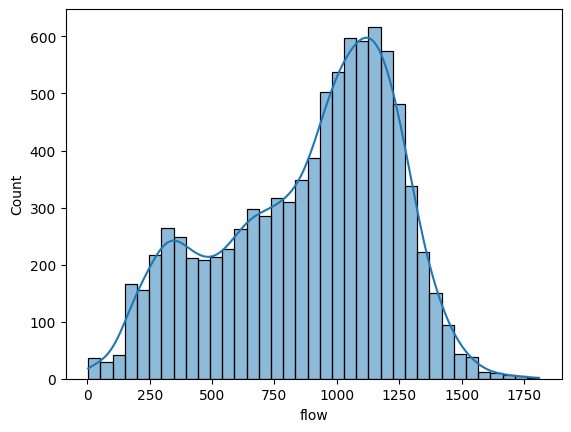

In [11]:
sns.histplot(champs_df.flow, kde=True)

<Axes: xlabel='occupancy_rate', ylabel='Count'>

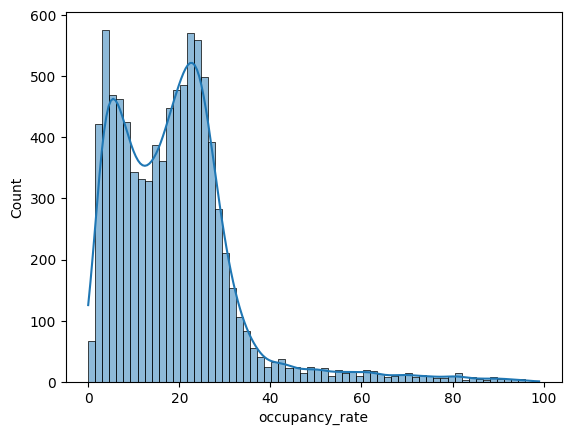

In [12]:
sns.histplot(champs_df.occupancy_rate, kde=True)

# Missing Values

In [13]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending = False)

occupancy_rate    1.546724
flow              1.475116
road_name         0.000000
date              0.000000
dtype: float64

<Axes: >

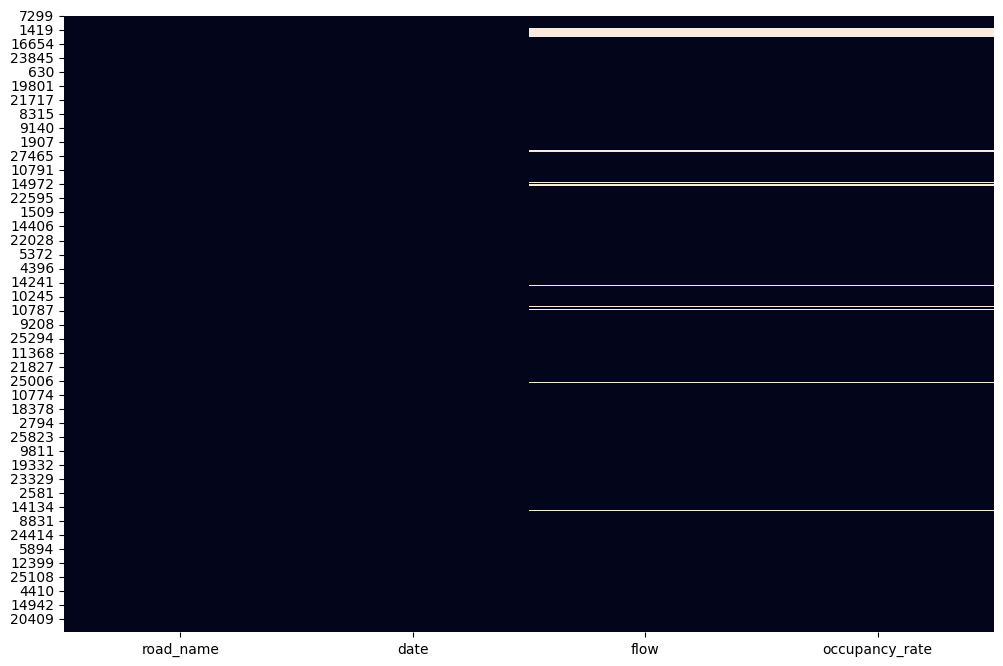

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(champs_df.isna(), cbar=False)

# Duplicates

In [15]:
print(f'Number of duplicated records = {df.duplicated().sum()}')

Number of duplicated records = 0


# Handling missing values

In [16]:
def missing_values(df):
    df['occupancy_rate'] = df['occupancy_rate'].interpolate(method='linear')
    df['flow'] = df['flow'].interpolate(method='linear')
    return df
champs_df = missing_values(champs_df)
conv_df = missing_values(conv_df)
sts_df = missing_values(sts_df)

In [17]:
(champs_df.isna().sum()/champs_df.shape[0]*100).sort_values(ascending = False)

road_name         0.0
date              0.0
flow              0.0
occupancy_rate    0.0
dtype: float64

<Axes: >

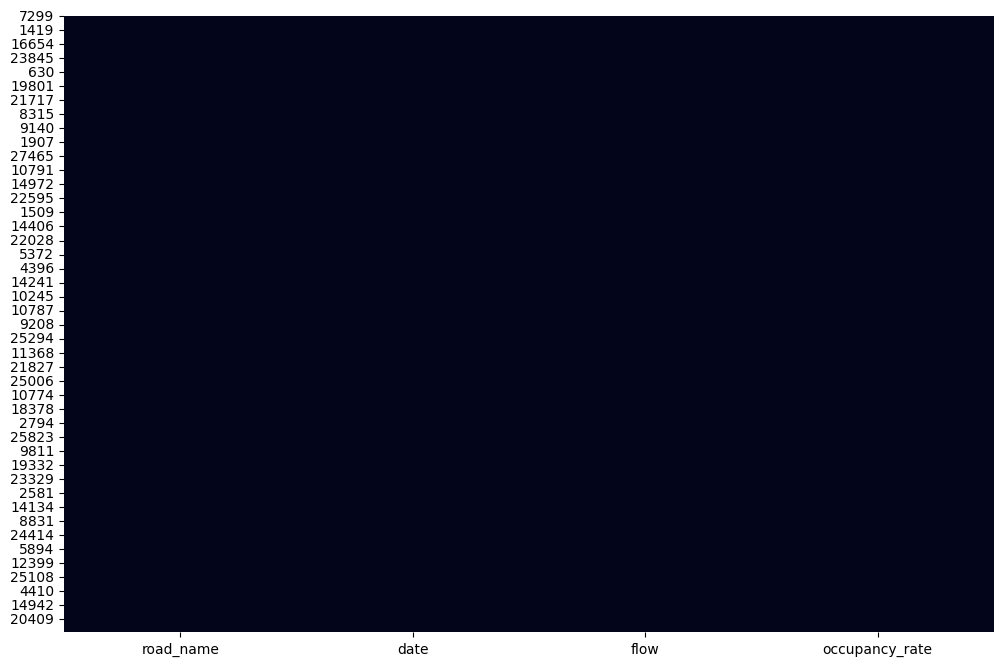

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(champs_df.isna(), cbar=False)

In [19]:
def drop_road_name(df):
    df = df.drop(columns='road_name')
    return df
champs_df = drop_road_name(champs_df)
conv_df = drop_road_name(conv_df)
sts_df = drop_road_name(sts_df)

In [20]:
def date_index(df):
    df = df.set_index('date')
    return df

champs_df = date_index(champs_df)
conv_df = date_index(conv_df)
sts_df =  date_index(sts_df)

champs_df

flow  occupancy_rate
date                                             
2022-11-01 03:00:00+00:00   672.0         8.89223
2022-11-01 04:00:00+00:00   513.0         7.12889
2022-11-01 05:00:00+00:00   494.0         6.22500
2022-11-01 06:00:00+00:00   513.0         5.80723
2022-11-01 07:00:00+00:00   484.0         5.57111
...                           ...             ...
2023-11-30 19:00:00+00:00  1433.0        30.87000
2023-11-30 20:00:00+00:00  1253.0        24.38111
2023-11-30 21:00:00+00:00  1069.0        20.40723
2023-11-30 22:00:00+00:00   950.0        16.66334
2023-11-30 23:00:00+00:00   863.0        13.60389

[9314 rows x 2 columns]

# Check for Stationarity

In [21]:
from statsmodels.tsa.stattools import adfuller
champs_df_flow = champs_df.copy()
champs_df_or= champs_df.copy()
champs_df_flow =champs_df_flow.drop(columns='occupancy_rate')
champs_df_or =champs_df_or.drop(columns='flow')

conv_df_flow = conv_df.copy()
conv_df_or= conv_df.copy()
conv_df_flow =conv_df_flow.drop(columns='occupancy_rate')
conv_df_or =conv_df_or.drop(columns='flow')

sts_df_flow = sts_df.copy()
sts_df_or= sts_df.copy()
sts_df_flow =sts_df_flow.drop(columns='occupancy_rate')
sts_df_or =sts_df_or.drop(columns='flow')

def check_stationarity(df):
    dftest = adfuller(df)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

print("Champs Flow", check_stationarity(champs_df_flow))
print("Champs Occupancy Rate", check_stationarity(champs_df_or))
print("Conv Flow", check_stationarity(champs_df_flow))
print("Conv Occupancy Rate", check_stationarity(champs_df_or))
print("Sts Flow", check_stationarity(champs_df_flow))
print("Sts Occupancy Rate", check_stationarity(champs_df_or))

The series is stationary
Champs Flow None
The series is stationary
Champs Occupancy Rate None
The series is stationary
Conv Flow None
The series is stationary
Conv Occupancy Rate None
The series is stationary
Sts Flow None
The series is stationary
Sts Occupancy Rate None


<Axes: xlabel='date'>

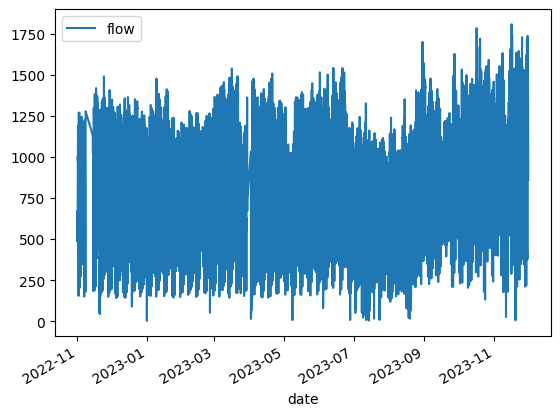

In [22]:
champs_df_flow.plot()

In [23]:
# Function from Stack OverFlow
import numpy as np
from statsmodels.tsa.stattools import arma_order_select_ic

def find_freq(x):
    n = len(x)
    spec = arma_order_select_ic(x, max_ar=4, max_ma=0, ic=['aic', 'bic', 'hqic'])
    max_spec = max(spec['aic'].min().min(), spec['bic'].min().min(), spec['hqic'].min().min())

    if max_spec > 10:  # Arbitrary threshold
        period = round(1 / np.fft.fftfreq(n, d=1)[np.argmax(np.abs(np.fft.fft(x)))])
        if period == np.inf:  # Find next local maximum
            j = np.where(np.diff(np.abs(np.fft.fft(x))) > 0)[0]
            if len(j) > 0:
                nextmax = j[0] + np.argmax(np.abs(np.fft.fft(x))[j[0]:500])
                period = round(1 / np.fft.fftfreq(n, d=1)[nextmax])
            else:
                period = 1
    else:
        period = 1

    return period


freq_flow = find_freq(champs_df_flow)
freq_flow

-26

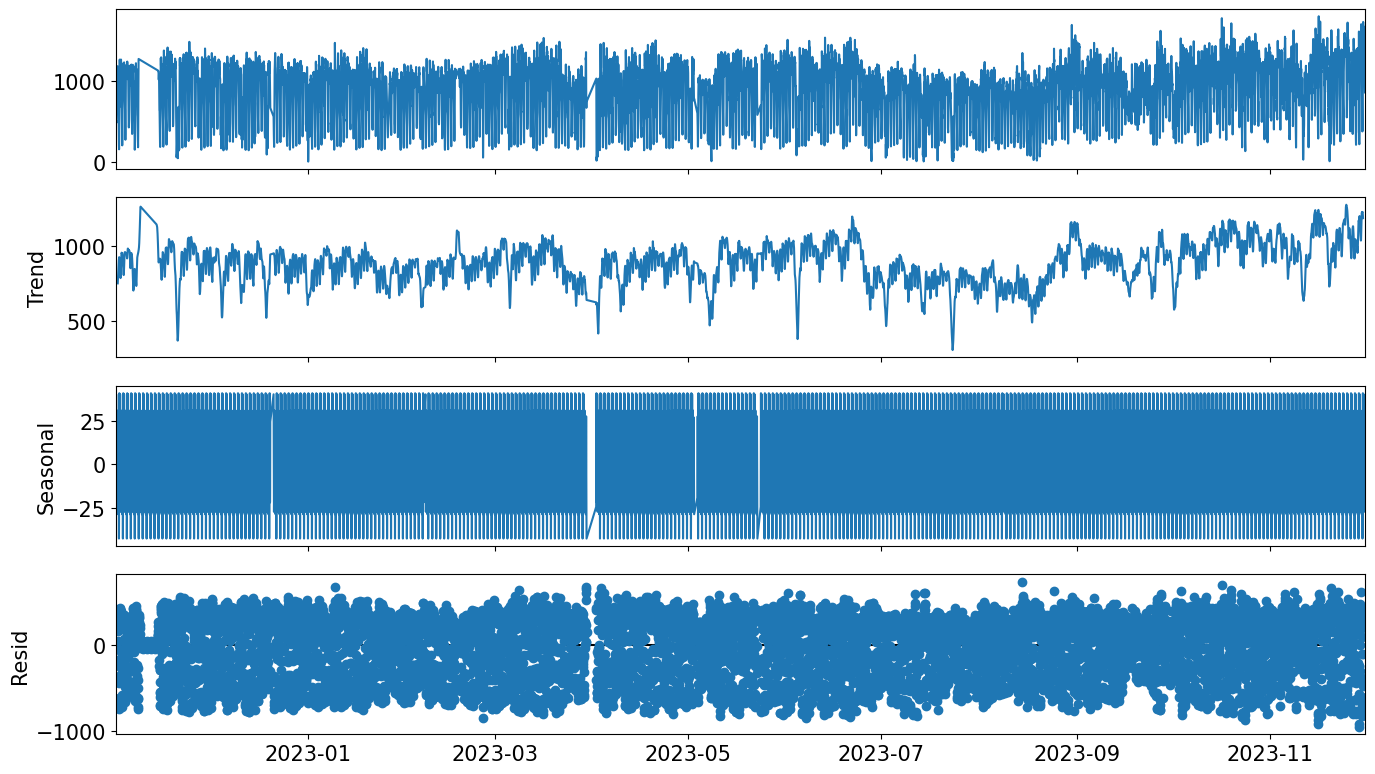

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)
result = seasonal_decompose(champs_df_flow, model='additive', period=30)
fig = result.plot()

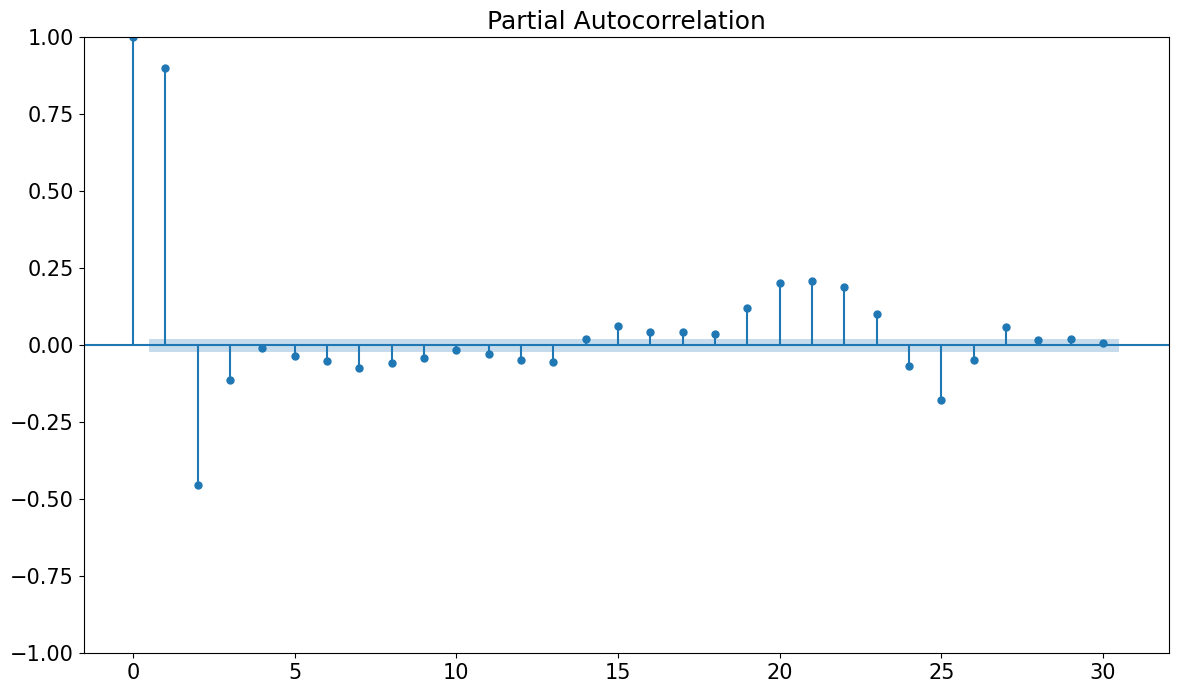

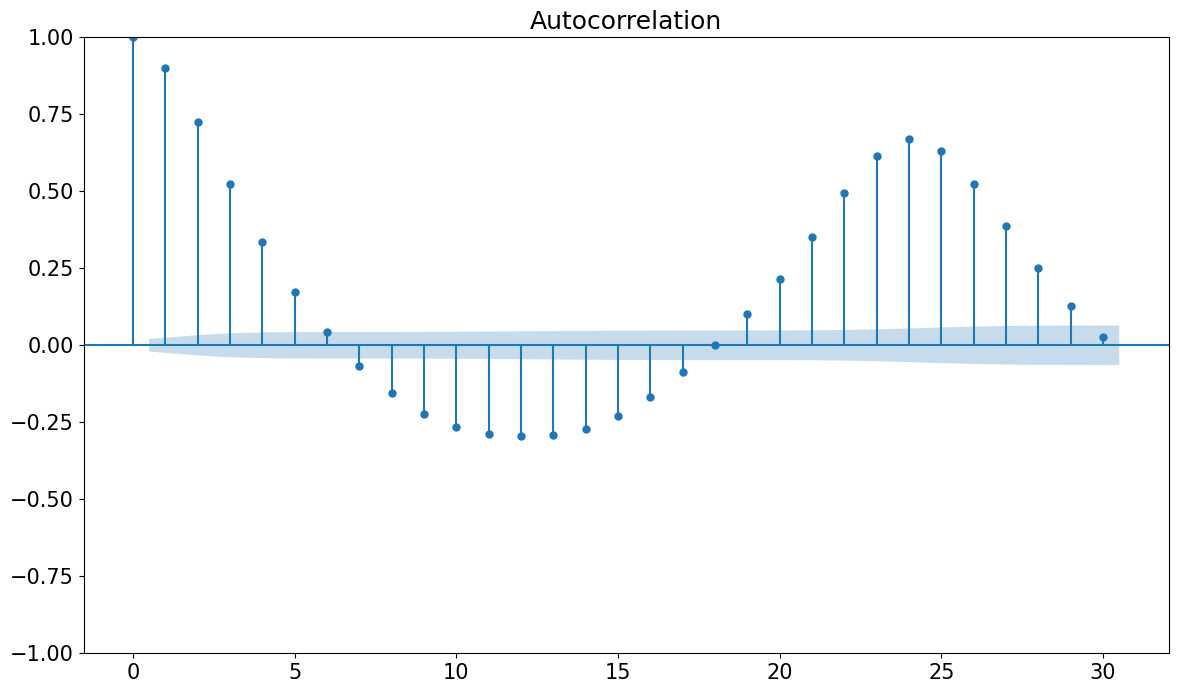

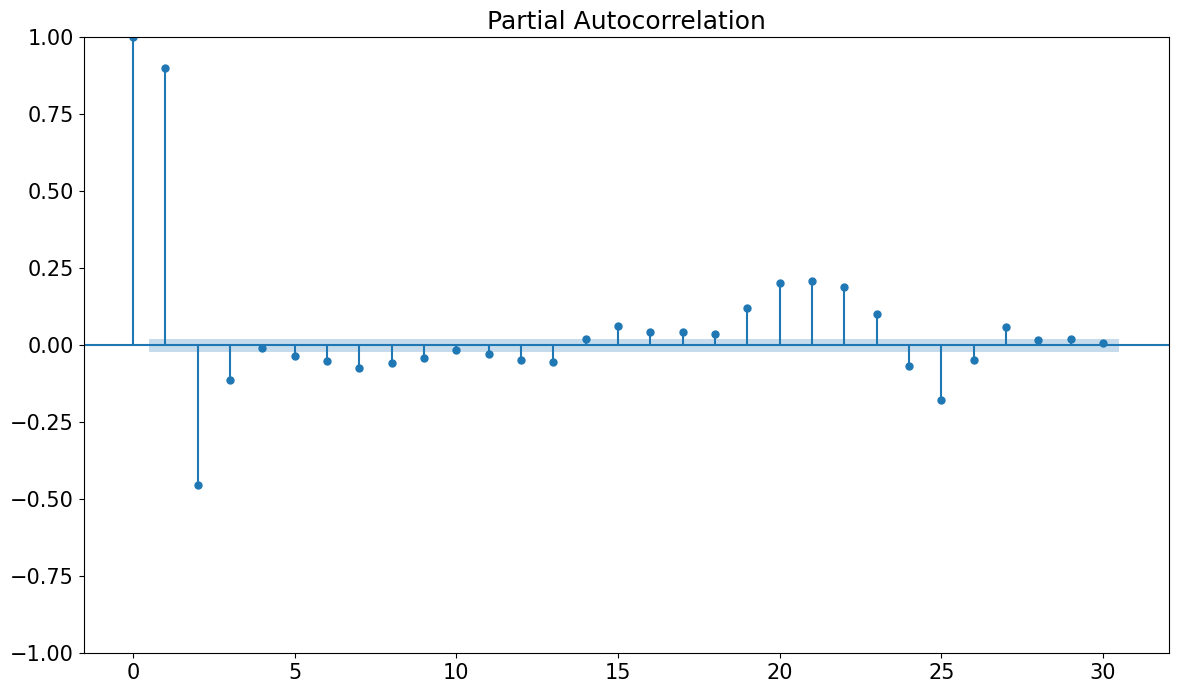

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(champs_df['flow'], lags=30)
plot_pacf(champs_df['flow'], lags=30)

''''from pmdarima.arima import auto_arima
stepwise_model = auto_arima(champs_df_flow, start_p=4, start_q=10,
                           max_p=5, max_q=30, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())''''

# Prophet

In [26]:
from prophet import Prophet

In [27]:
import pandas as pd

def convert_datetime(df):
    if 'date' not in df.columns:
        df = df.reset_index()

    
    df['date'] = pd.to_datetime(df['date'], utc=True)
    return df

champs_df_flow = convert_datetime(champs_df_flow)
champs_df_or = convert_datetime(champs_df_or)
conv_df_flow = convert_datetime(conv_df_flow)
conv_df_or = convert_datetime(conv_df_or)
sts_df_flow = convert_datetime(sts_df_flow)
sts_df_or = convert_datetime(sts_df_or)



In [28]:
def remove_time_zone(df):
    df['date'] = df['date'].dt.tz_convert(None)
    return df

champs_df_flow = remove_time_zone(champs_df_flow)
champs_df_or = remove_time_zone(champs_df_or)
conv_df_flow = remove_time_zone(conv_df_flow)
conv_df_or = remove_time_zone(conv_df_or)
sts_df_flow = remove_time_zone(sts_df_flow)
sts_df_or = remove_time_zone(sts_df_or)

In [29]:
def prophet_renaming(df):
    columns_name = []
    for col in df.columns:
        columns_name.append(col)
    
    if "flow" in columns_name:
        col_to_rename = {
            "date": "ds", 
            "flow": "y"
        }
        df =  df.rename(columns=col_to_rename)
    else:
        col_to_rename = {
            "date": "ds", 
            "occupancy_rate": "y"
        }
        df =  df.rename(columns=col_to_rename)
    return df

champs_df_flow = prophet_renaming(champs_df_flow)
champs_df_or = prophet_renaming(champs_df_or)
conv_df_flow = prophet_renaming(conv_df_flow)
conv_df_or = prophet_renaming(conv_df_or)
sts_df_flow = prophet_renaming(sts_df_flow)
sts_df_or = prophet_renaming(sts_df_or)

champs_df_flow


ds       y
0    2022-11-01 03:00:00   672.0
1    2022-11-01 04:00:00   513.0
2    2022-11-01 05:00:00   494.0
3    2022-11-01 06:00:00   513.0
4    2022-11-01 07:00:00   484.0
...                  ...     ...
9309 2023-11-30 19:00:00  1433.0
9310 2023-11-30 20:00:00  1253.0
9311 2023-11-30 21:00:00  1069.0
9312 2023-11-30 22:00:00   950.0
9313 2023-11-30 23:00:00   863.0

[9314 rows x 2 columns]

In [30]:
from sklearn.model_selection import train_test_split
df_train_pph, df_test_pph = train_test_split(champs_df_flow,test_size= 0.05, random_state = 42, shuffle = False)

df_train_pph.tail()

ds      y
8843 2023-11-11 09:00:00   36.0
8844 2023-11-11 10:00:00   29.0
8845 2023-11-11 11:00:00   27.0
8846 2023-11-11 12:00:00  122.0
8847 2023-11-11 13:00:00  367.0

In [31]:
from sklearn.model_selection import train_test_split
def train_test_split_function(df):
    train, test = train_test_split(df,test_size= 0.05, random_state = 42, shuffle = False )
    return train, test


champs_flow_train_pph, champs_flow_test_pph = train_test_split_function(champs_df_flow)
champs_or_train_pph, champs_or_test_pph = train_test_split_function(champs_df_or)

conv_flow_train_pph, conv_flow_test_pph = train_test_split_function(conv_df_flow)
conv_or_train_pph, conv_or_test_pph = train_test_split_function(conv_df_or)

sts_flow_train_pph, sts_flow_test_pph = train_test_split_function(sts_df_flow)
sts_or_train_pph, sts_or_test_pph = train_test_split_function(sts_df_or)

champs_flow_test_pph.head()

ds      y
8848 2023-11-11 14:00:00  320.0
8849 2023-11-11 15:00:00  499.0
8850 2023-11-11 16:00:00  401.0
8851 2023-11-11 17:00:00  455.0
8852 2023-11-11 18:00:00  614.0

In [32]:
m = Prophet(weekly_seasonality=True, daily_seasonality=True, yearly_seasonality=True )
m.fit(champs_flow_train_pph)


15:55:10 - cmdstanpy - INFO - Chain [1] start processing
15:55:11 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
future = m.make_future_dataframe(periods=len(champs_flow_test_pph), freq='H', include_history=False)
future.tail()

ds
461 2023-11-30 19:00:00
462 2023-11-30 20:00:00
463 2023-11-30 21:00:00
464 2023-11-30 22:00:00
465 2023-11-30 23:00:00

In [39]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat  yhat_lower   yhat_upper
461 2023-11-30 19:00:00  1082.138489  786.602397  1379.234404
462 2023-11-30 20:00:00   991.127119  718.173227  1285.460785
463 2023-11-30 21:00:00   909.068970  608.266591  1224.660585
464 2023-11-30 22:00:00   863.439485  557.717168  1158.535133
465 2023-11-30 23:00:00   838.438807  538.514272  1127.038268

In [40]:
df_scores = pd.DataFrame(columns = ["model", "MSE", "RMSE", "MAE", "target"])

In [41]:
# OSCAR FUNCTION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import learning_curve, TimeSeriesSplit

f_scores = pd.DataFrame(columns = ["model", "MSE", "RMSE", "MAE", "target"])

def evaluation(model, y_train,y_test,draw_learning_curve, col_to_add ): 

  global df_scores
  global forecast

  #special cases for baseline models and Facebook's Prophet model
  if model=="mean": 
    y_pred = [y_train.mean() for _ in range(len(X_test))]

  elif model == "flow_previous_week":
    y_pred = shifting(X_test_not_processed)["flow_prev_week"]

  elif model == "occ_previous_week":
     y_pred = shifting(X_test_not_processed)["occupancy_rate_prev_week"]

  elif model == "prophet": 
    y_pred = forecast[["yhat"]]

  #General case 
  else :
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Score: {0:.3f}".format(model.score(X_test, y_test)))

  mse = round(mean_squared_error(y_test, y_pred),3)
  rmse = round( mean_squared_error(y_test, y_pred,squared = False), 3)
  mae = round(mean_absolute_error(y_test, y_pred), 3)

  print("MSE: ", mse ) 
  print("RMSE: " , rmse ) 
  print("MAE: " , mae)
  print("Mean", y_test.mean())

  #Adding into df_score the current scores. 
  current_model_score = pd.DataFrame({"model": [str(model)+"_"+str(y_train.name)], "MSE": [mse], "RMSE": [rmse], "MAE":[mae], "target": col_to_add})
  str_to_replace = "Pipeline(steps=[('selector',\n                 SelectKBest(score_func=)),\n                ('regressor',"
  df_scores= pd.concat([df_scores,current_model_score], axis = 0, ignore_index = True).drop_duplicates()
  df_scores["model"]=df_scores.model.apply(lambda text : str(text[len(str_to_replace):]) if len(text)>100 else text)
  

  # Plot of a learning curve with a TimeSeriesSplit.
  if draw_learning_curve==True:

    ts_cv = TimeSeriesSplit(n_splits=5)


    train_sizes, train_scores, test_scores = learning_curve (model , X_train, y_train, cv = ts_cv, scoring = "neg_mean_squared_error", train_sizes = np.linspace(0.1, 1, 10))
    
    train_scores = np.sqrt(-train_scores)
    test_scores = np.sqrt(-test_scores)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Size of the training set")
    plt.ylabel("Root Mean Squared Error")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")

    plt.show()
     

In [42]:
evaluation('prophet', champs_flow_train_pph.y, champs_flow_test_pph.y, False, "prophet_flow")

MSE:  99213.357
RMSE:  314.982
MAE:  255.426
Mean 1060.9484978540772


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [51]:
plot_components_plotly(m, forecast)